<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Parcial2/Parcial_2_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

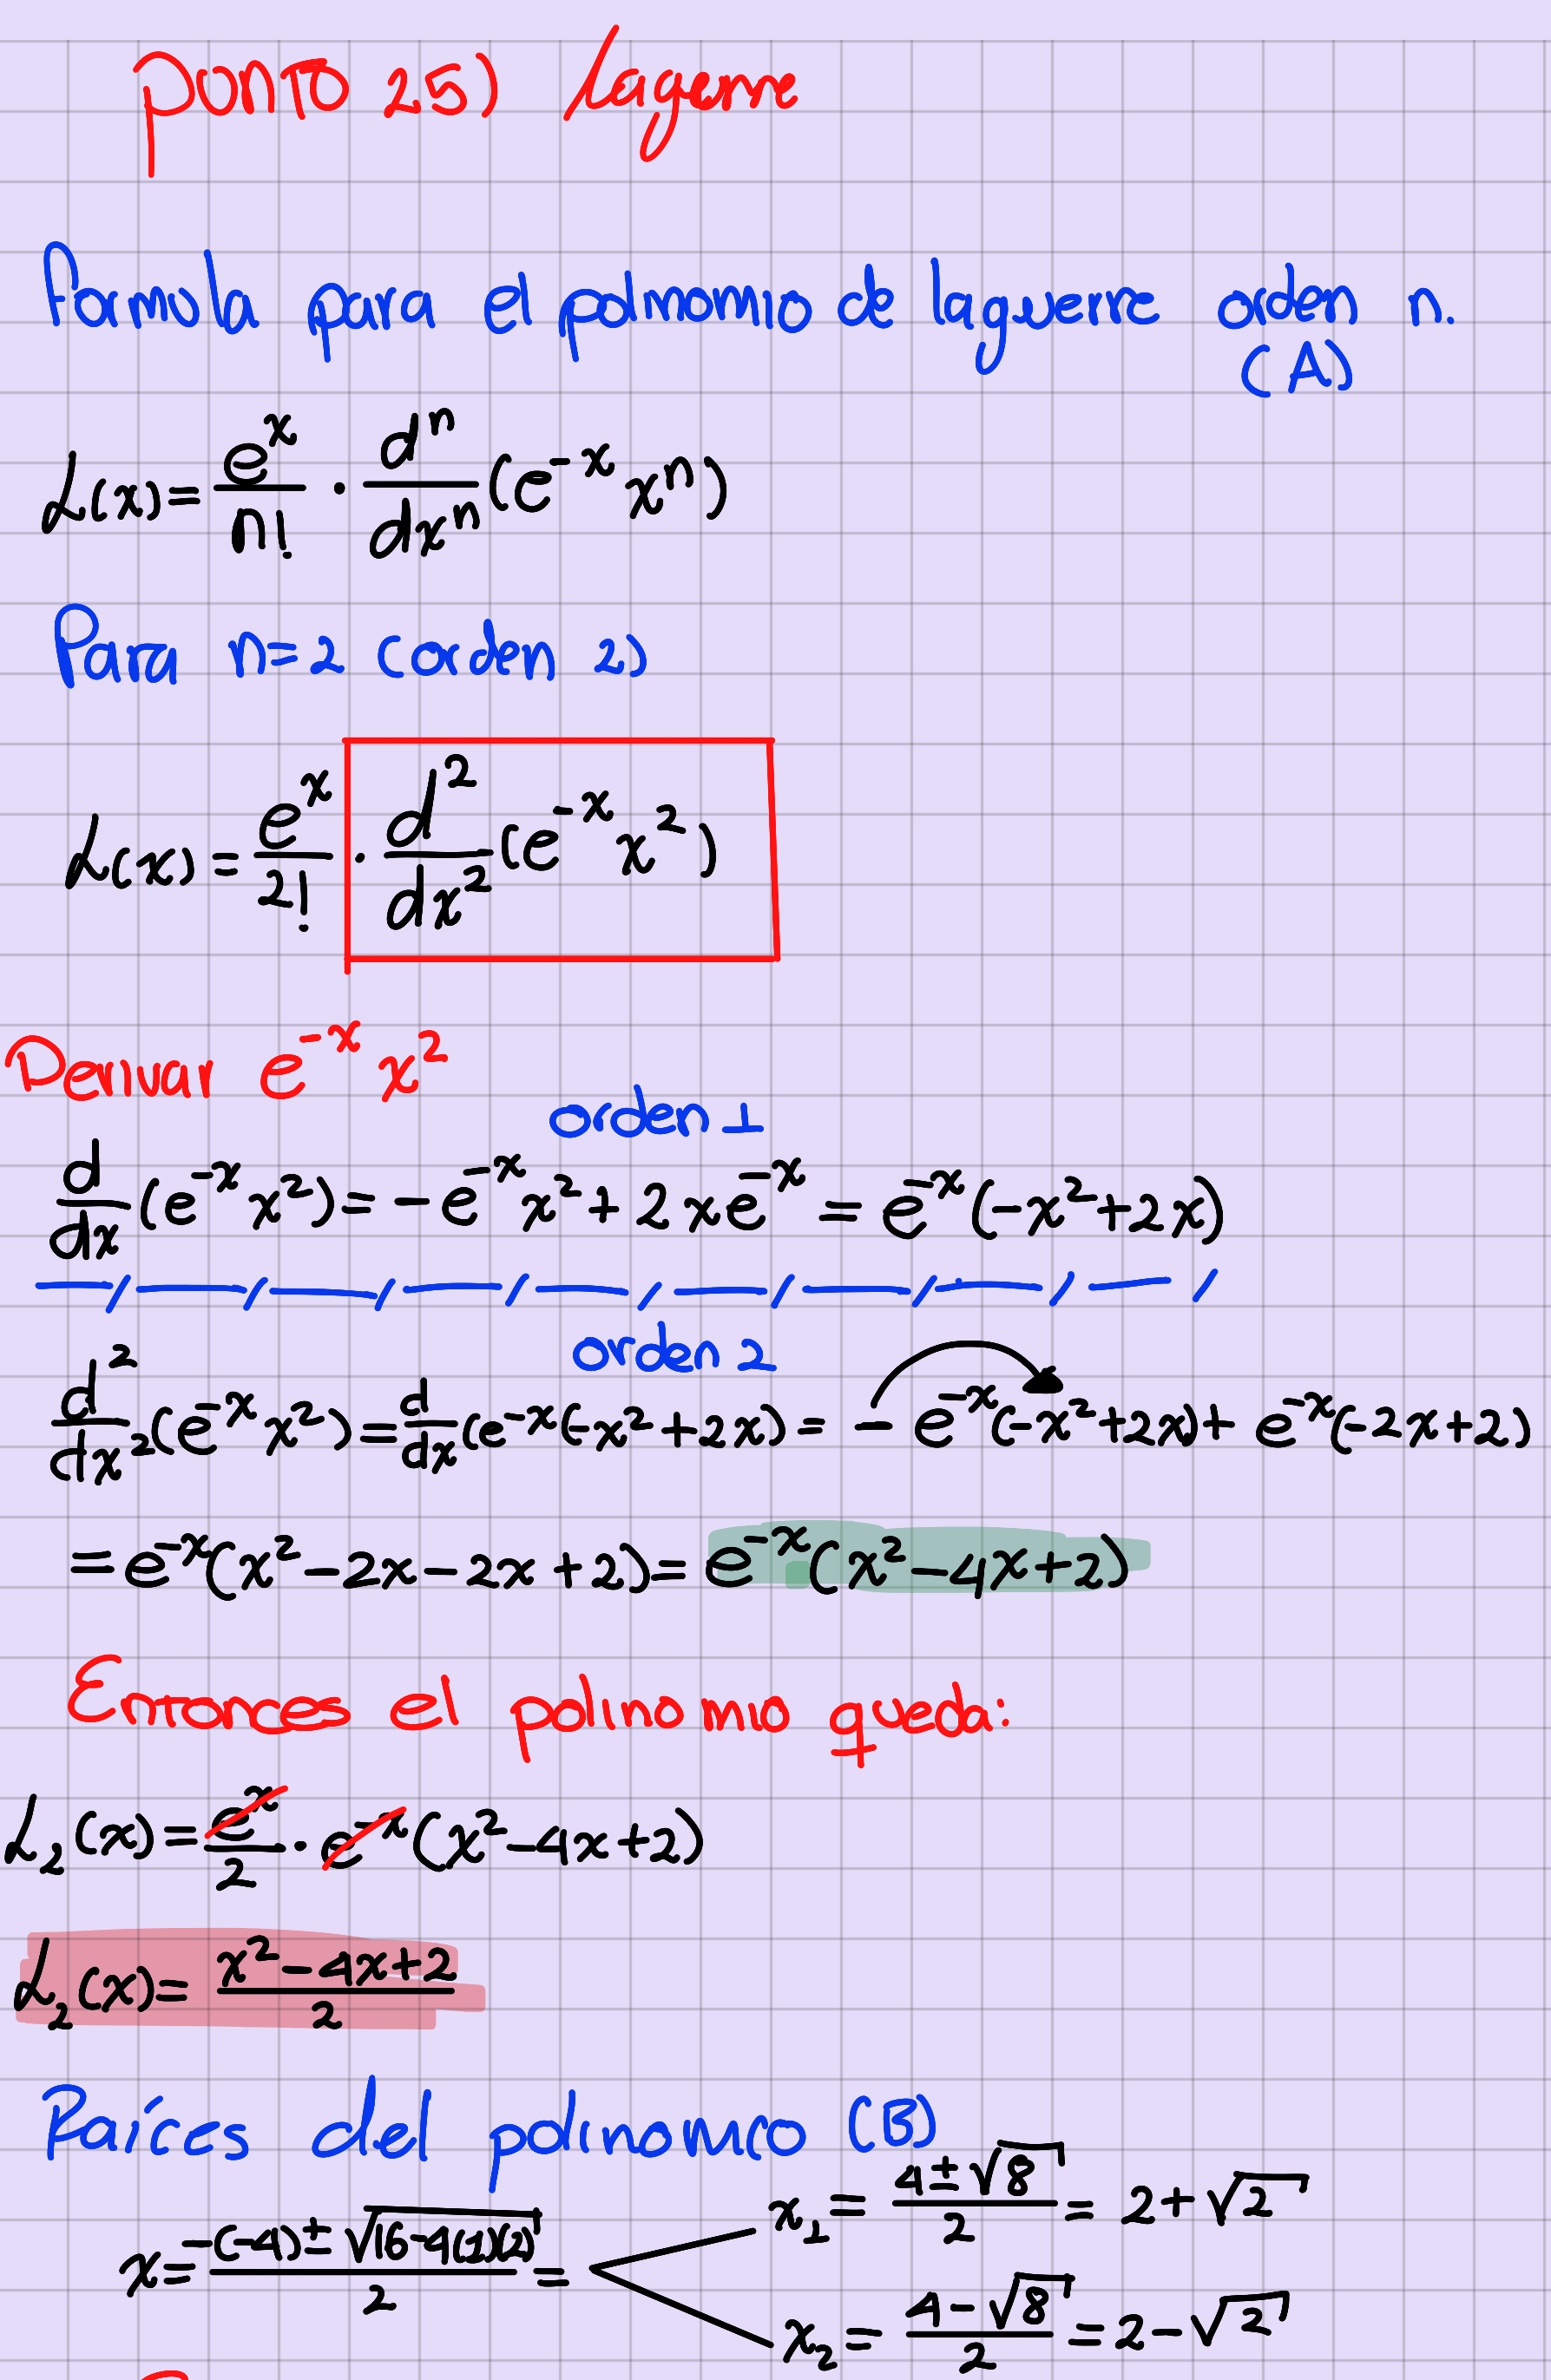

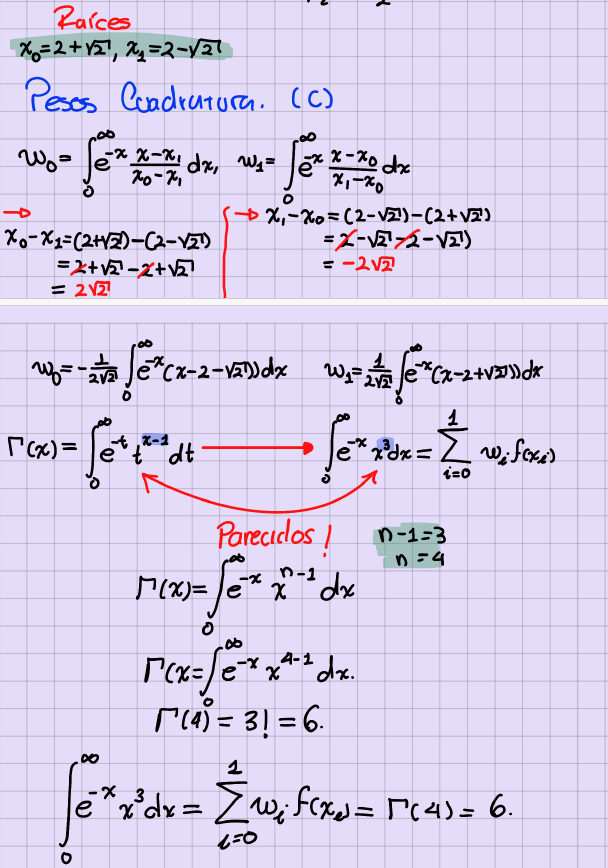